<a href="https://colab.research.google.com/github/swati2697/MLpractice/blob/main/Real_World_Image_classification_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In datasets like Fashion MNIST, data is a set of very uniform images staged and framed in 28x28 pixels. Here the dataset was built-in with handily split into training and test data along with all labels specified.

But in real world applications, there are larger images where the feature/subject might be in different locations, sizes, aspect ratios and even multiple subjects too in single image. Also we would have to build our own dataset as well as store it as per labels. 

There are many APIs available that helps us to build our own datasets easily. One of them is:
IMAGE GENERATOR in Tensorflow-
It can flow images from a directory and perform operations such as resizing them on the fly.
One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you.
  How it works?
  One feature of the image generator is that you can point it at a directory    and then the sub-directories of that will automatically generate labels for you.
  For example, 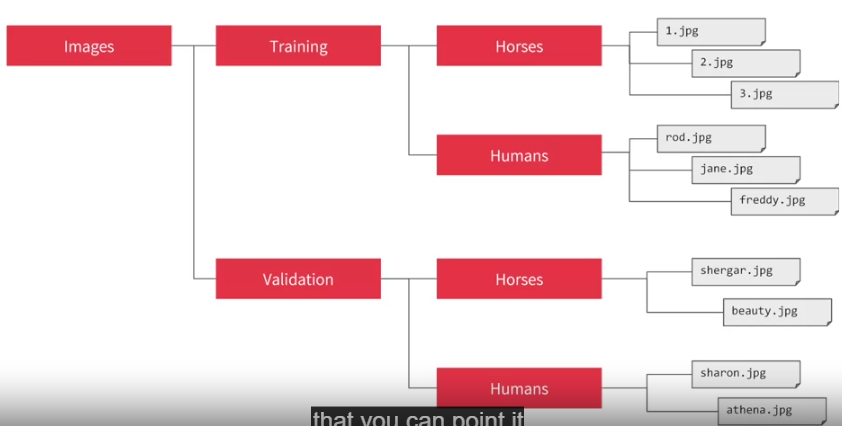

  You have an images directory and in that, you have sub-directories for training and validation. When you put sub-directories in these for horses and humans and store the requisite images in there, the image generator can create a feeder for those images and auto label them for you. So for example, if an image generator is pointed at the training directory and validation directory, the labels will be horses and humans and all of the images in each directory will be loaded and labeled accordingly.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1 ./255)#rescale to normalize data
#instantiate image generator- generating training data
train_generator = train_datagen.flow_from_directory(  #to load images from that directory and its sub-directories-  It's a common mistake that people point the generator at the 
    #sub-directory. It will fail in that circumstance. You should always point it at the directory that contains sub-directories that contain your images. The names of the 
    #sub-directories will be the labels for your images that are contained within them. So make sure that the directory you're pointing to is the correct one.
    train_dir, #pointing to the sub-directory
    target_size=(300, 300), #images might come in all shapes and sizes and unfortunately for training a neural network, the input data all has to be the same size, so the images 
    #will need to be resized to make them consistent. The nice thing about this code is that the images are resized for you as they're loaded. So you don't need to preprocess 
    #thousands of images on your file system.- The advantage of doing it at runtime like this is that you can then experiment with different sizes without impacting your source data.
    batch_size=128,#The images will be loaded for training and validation in batches where it's more efficient than doing it one by one.
    class_mode='binary' #a binary classifier i.e. it picks between two different things which would be the labels(for more than 2, there are different ways to do)
)

The validation generator should be exactly the same except of course it points at a different directory, the one containing the sub-directories containing the test images.

In [ ]:
#Defining a ConvNet to use complex images
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),#input shape has input image shape 300x300 and colour channels as parameters- since input 
      #images would be multicoloured hence 3 for RGB channels
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.Flatten(),
      tf.keras.Dense(512, activation='relu'),
      tf.keras.Dense(1, activation='sigmoid')#before when you created the output layer, you had one neuron per class, but now there's only one neuron for two classes. That's because
      #we're using a different activation function where sigmoid is great for binary classification, where one class will tend towards zero and the other class tending towards one. 
      #You could use two neurons here if you want, and the same softmax function as before, but for binary this is a bit more efficient.                           
]   
)

Output comes as follows:
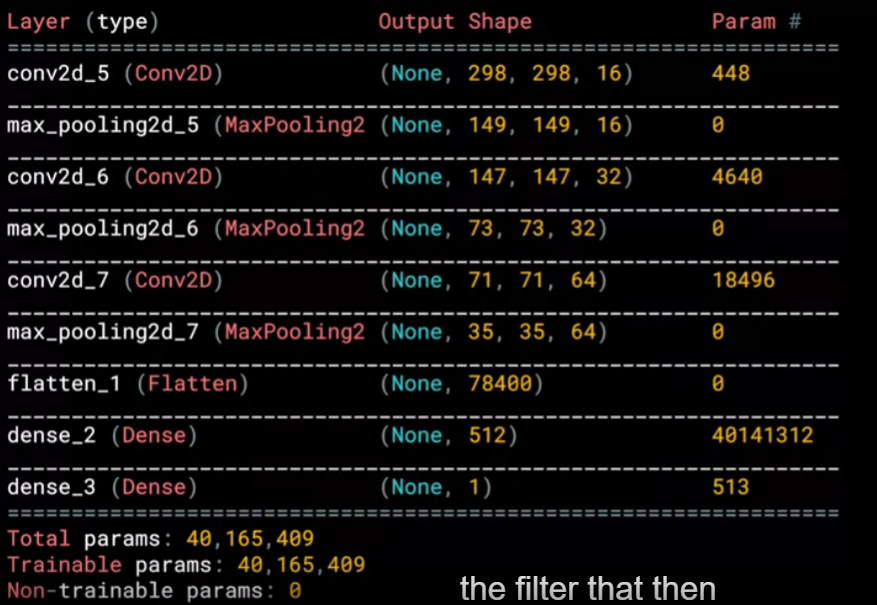

After model is designed, we need to compile it. Here we would be using different kinds of errors and metrics for which the links are given below for reference:
Losses types: https://keras.io/api/losses/

In [ ]:
from tf.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',#binary crossentropy because we are explaining for the instance oh humans and horses categorization so binary
              optimizer=RMSprop(lr=0.01),#taken RMSpror to adjust the learning rate to experiment with performance
              metrics=['acc'])

Now we are going to train the model. Here we are not using datasets instead we are using image GENERATORS.So in place of model.fit, we would be using model.fit_generator.

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 8,
    verbose = 2
)

Lets have the explained details of model.fit_generator parameters below-


1.   train_generator: Just like in model.fit we give training data to train, streams the imagery from training directory. 
2.   steps_per_epoch: There are 1,024 images in the training directory, so we're loading them in 128 at a time. So in order to load them all, we need to do 8 batches( the batch size you used when we created it, it was 20).
3.   epochs: bit complex classification hence 15 epochs
4.   validation_data:  Specify the validation set that comes from the validation_generator ie streams data from validation directory.
5.   validation_steps: It had 256 images, and we wanted to handle them in batches of 32, so we will do 8 steps.
6.   verbose: Specifies how much to display while training is going on. With verbose set to 2, we'll get a little less animation hiding the epoch progress.



After the model is trained, we would do some model predictions. 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
#iterating over the loaded images
for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))#ensure that the dimensions match the input dimensions that you specified when designing the model.
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)#Expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.
  images = np.vstack([x])#Stack arrays in sequence vertically (row wise). This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,)
  #have been reshaped to (1,N).
  classes = model.predict(images, batch_size=10)#returns an array of classes-since in this case it is binary so this will only contain one item with a value close to 0 for one 
  #class and close to 1 for the other.
  print(classes[0])
  if(classes[0]>0.5):
    print(fn + "is a human")
  else:
    print(fn + "is a horse")